K-Nearest Neighbors Algorithm using Scikit-Learn
------------------------------------------------------------------------

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. 

> It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. 

KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

Theory
----------
The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

> Manhattan distance between 2 points is the distance along the axis, like you measure the distance in a right angled way. Usually used in circuits to measure the distance wires take; as the wires cannot run in between the circuit-boards.

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

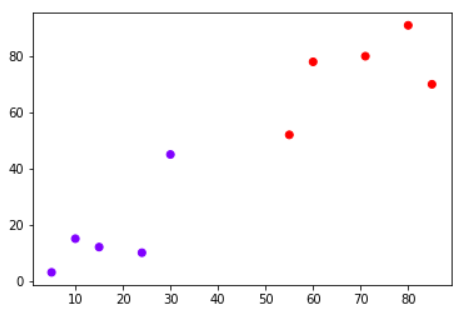

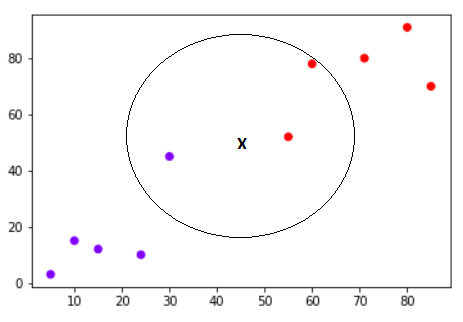

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

Implementing KNN Algorithm with Scikit-Learn
-------------------------------------------------------------------

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn import svm, datasets

irisdata = sns.load_dataset('iris')
irisdata.head()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
irisdata.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
17,5.1,3.5,1.4,0.3,setosa
96,5.7,2.9,4.2,1.3,versicolor
87,6.3,2.3,4.4,1.3,versicolor
2,4.7,3.2,1.3,0.2,setosa
99,5.7,2.8,4.1,1.3,versicolor
119,6.0,2.2,5.0,1.5,virginica


In [2]:
irisdata['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
X = irisdata.drop('species', axis=1)
y = irisdata['species']

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
# X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Comparing Error Rate with the K Value
-------------------------------------------------------
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

Text(0, 0.5, 'Mean Error')

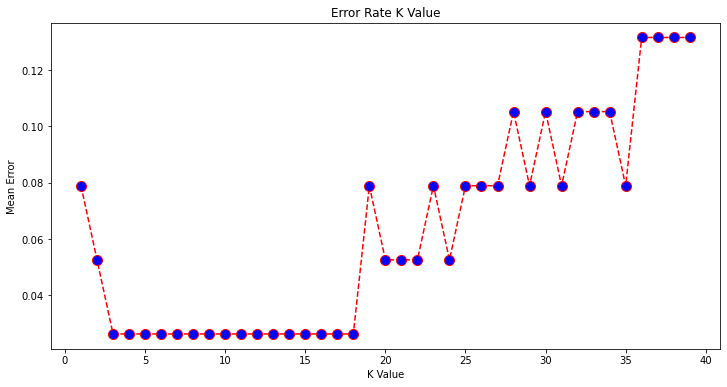

In [5]:
error = []

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')     

# Pros:

>1. Easy to implement.

>2. Lazy Learning algorithm and therefore requires no training. Therefore, it is also called as a non-parametric ML algo.

>3. It has only 2 parameters viz n_neighbors, distance function.

# Cons:

>1. It doesnt work well in high dimensional data.

>2. KNN algo has a high prediction cost for large datasets.

>3. It will not work well with categorical features.